# Global Suicide Analysis

## Imports & Data Loading

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading

For accessing the data from anywhere, it was pushed to my GitHub.  
The original Data is from [this Dataset from Kaggle](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016).

In [2]:
master_data = pd.read_csv("https://raw.githubusercontent.com/faaabi93/ml/master/models/data/suicide_data/master.csv")

master_data.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
master_data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

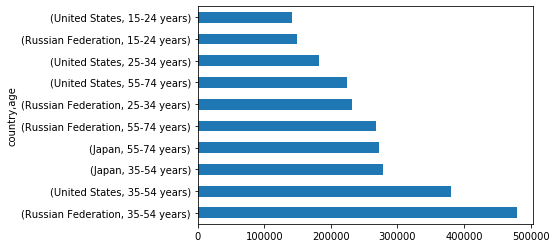

In [4]:
master_data.groupby(['country','age']).suicides_no.sum().nlargest(10).plot(kind='barh')

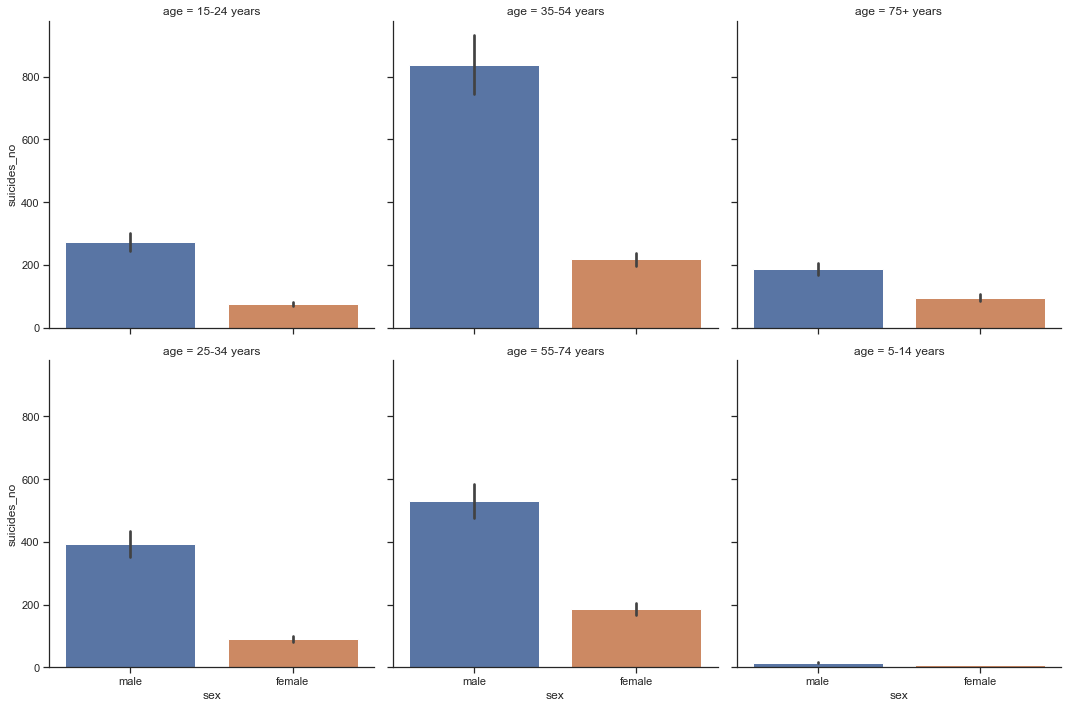

In [5]:
sns.set(style="ticks")
sns.catplot(x="sex", y="suicides_no", col="age", kind="bar", data=master_data, col_wrap=3)

In [6]:
master_data.groupby(["age", "sex"]).suicides_no.sum().unstack().reset_index().melt(id_vars="age")

,age,sex,value
0,15-24 years,female,175437
1,25-34 years,female,208823
2,35-54 years,female,506233
3,5-14 years,female,16997
4,55-74 years,female,430036
5,75+ years,female,221984
6,15-24 years,male,633105
7,25-34 years,male,915089
8,35-54 years,male,1945908
9,5-14 years,male,35267


In [7]:
master_data.age.unique().tolist()

['15-24 years',
 '35-54 years',
 '75+ years',
 '25-34 years',
 '55-74 years',
 '5-14 years']

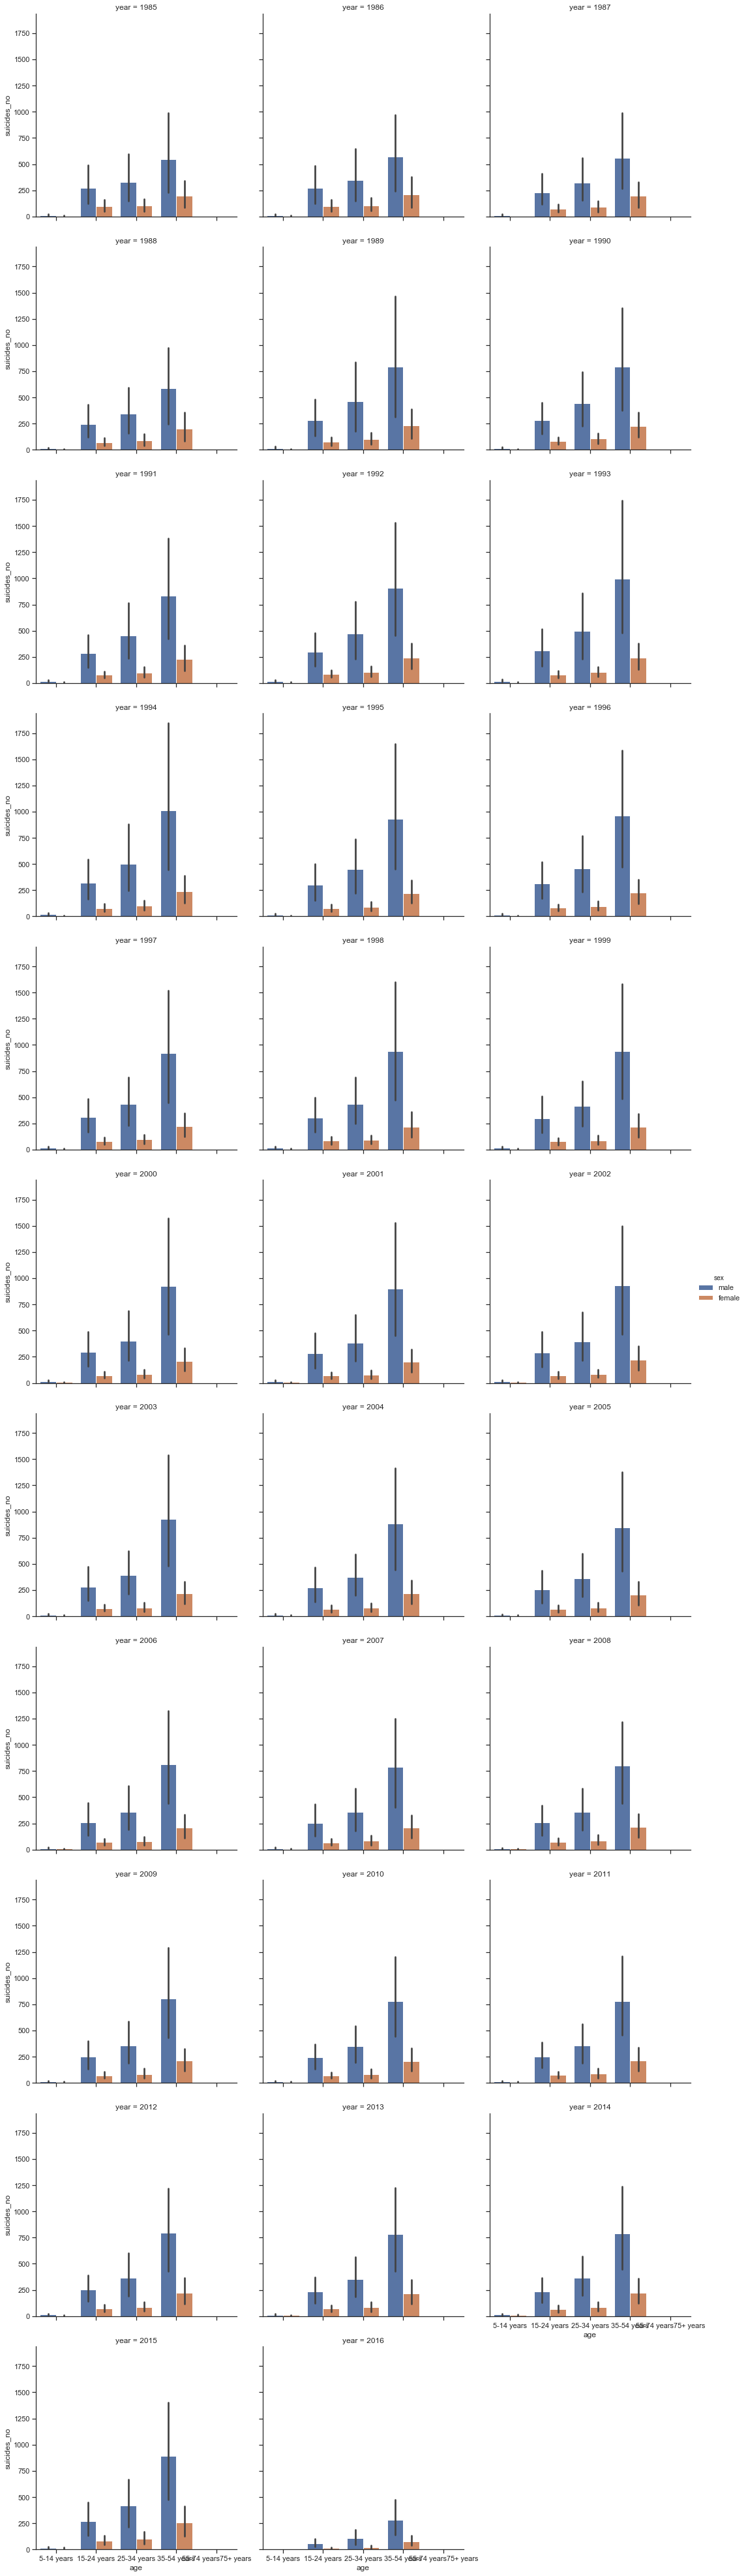

In [8]:
sns.catplot("age", "suicides_no", hue="sex", col="year", col_wrap=3, data=master_data, kind="bar", order=
            ['5-14 years',
             '15-24 years',
             '25-34 years',
             '35-54 years',
             '55-74 years'
             '75+ years'])

     year          age  suicides_no
0    1985  15-24 years        17870
1    1985  25-34 years        20771
2    1985  35-54 years        35748
3    1985   5-14 years          984
4    1985  55-74 years        28736
..    ...          ...          ...
186  2016  15-24 years         1195
187  2016  25-34 years         2070
188  2016  35-54 years         5766
189  2016  55-74 years         4715
190  2016    75+ years         1857

[191 rows x 3 columns]


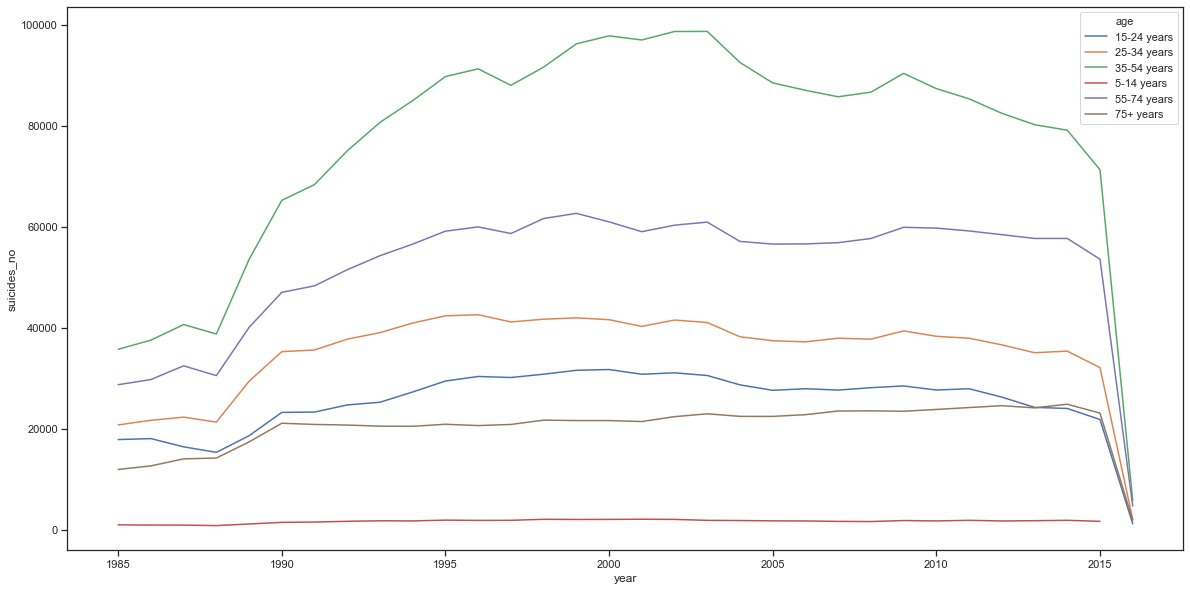

In [9]:
df = master_data.groupby(['year','age']).suicides_no.sum().reset_index()
print(df)

plt.figure(figsize=(20, 10))
sns.lineplot(x="year", y="suicides_no", hue="age", data=df)